In [7]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
data_folder='Data/Cityscapes/leftImg8bit/train'
right_pixels_walk=200
bottom_pixels_walk=200
right_pixels=[]
bottom_pixels=[]

In [3]:
for dir_path,folder,img_list in os.walk(data_folder):
    if len(img_list)!=0:
        for img_path in img_list:
            img=cv2.imread(dir_path+"/"+img_path)
            row_index = np.random.choice(img.shape[0]-bottom_pixels_walk, 1)[0]
            col_index = np.random.choice(img.shape[1]-right_pixels_walk, 1)[0]
            channel_index = np.random.choice(img.shape[2], 1)[0]
            right_pixels.append(img[row_index,col_index:col_index+right_pixels_walk,channel_index])
            bottom_pixels.append(img[row_index:row_index+right_pixels_walk,col_index,channel_index])

In [4]:
right_pixels=np.array(right_pixels)
bottom_pixels=np.array(bottom_pixels)

In [5]:
corr_right=[]
corr_bottom=[]
for i in range(1,200):
    corr_right.append(np.corrcoef(right_pixels[:,0],right_pixels[:,i])[1,0])
    corr_bottom.append(np.corrcoef(bottom_pixels[:,0],bottom_pixels[:,i])[1,0])

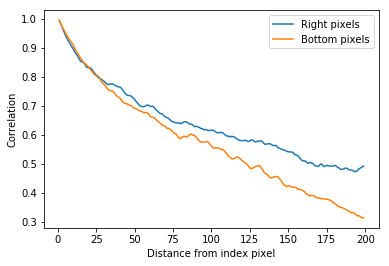

In [6]:
plt.plot(range(1,200),corr_right,label='Right pixels')
plt.plot(range(1,200),corr_bottom,label='Bottom pixels')
plt.legend()
plt.xlabel('Distance from index pixel')
plt.ylabel('Correlation')
plt.show()